   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  engi

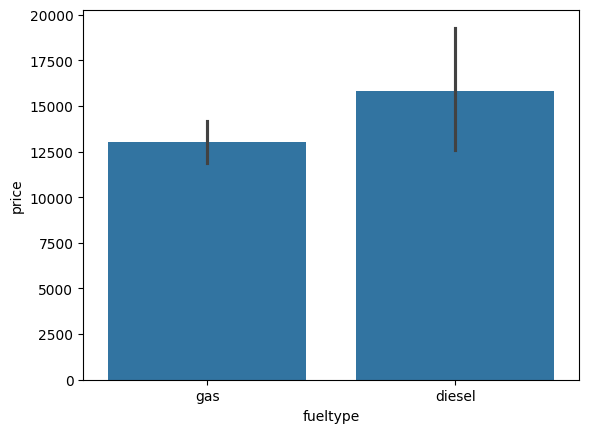

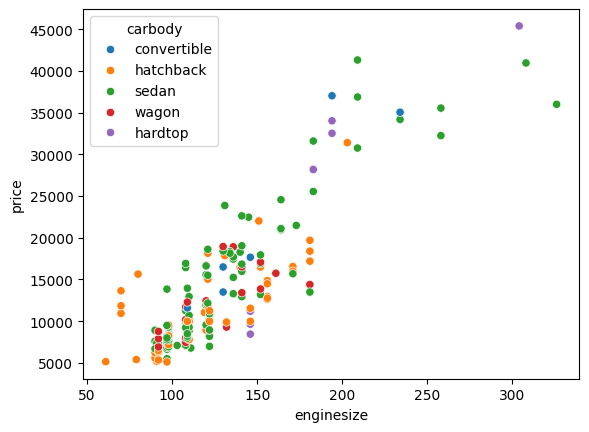

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64


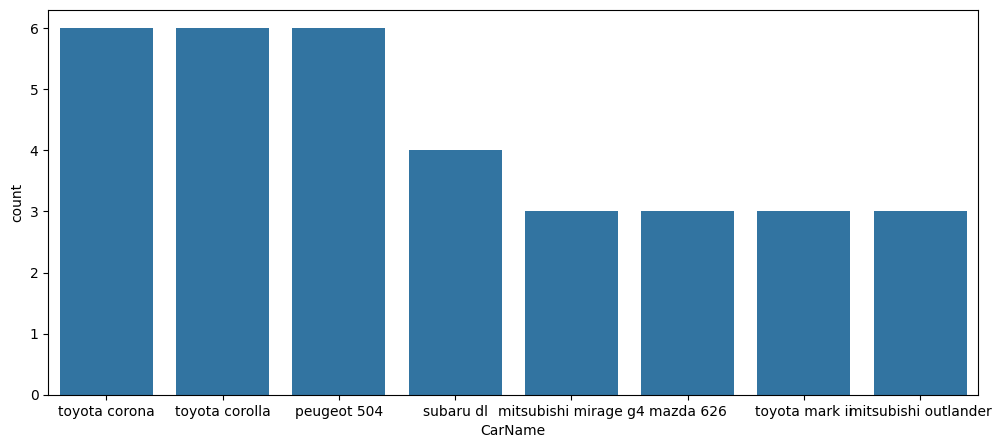

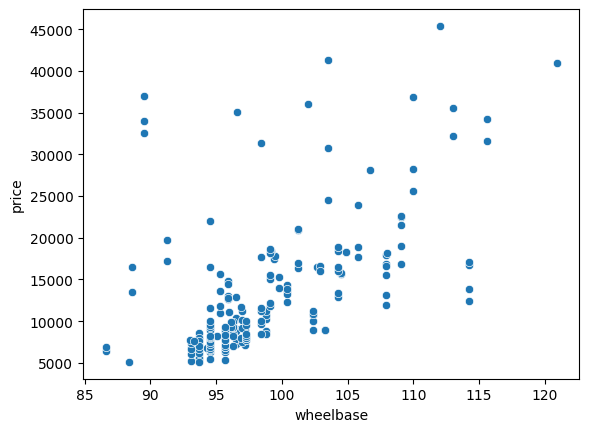

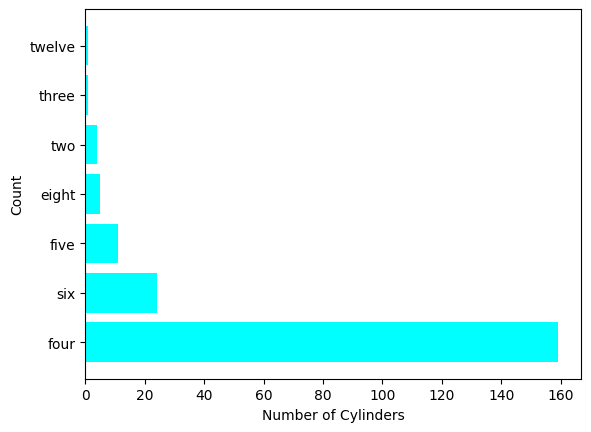

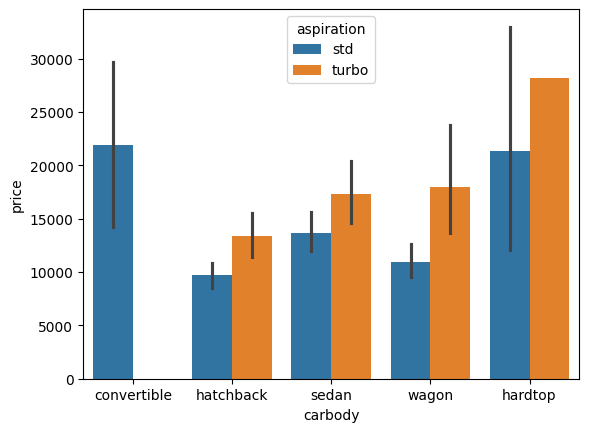

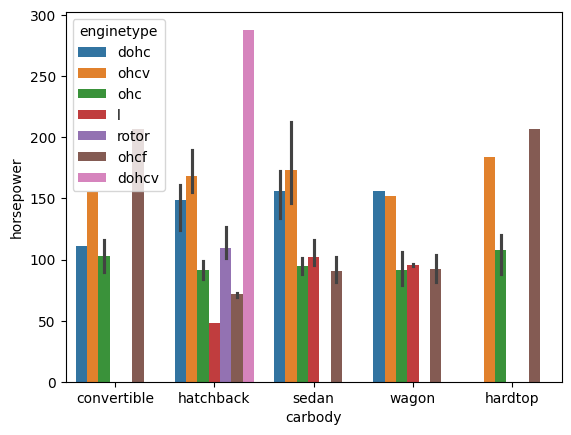

   car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0       1          3      2.0       1.0         0.0         1.0      0.0   
1       2          3      3.0       1.0         0.0         1.0      0.0   
2       3          1      1.0       1.0         0.0         1.0      2.0   
3       4          2      4.0       1.0         0.0         0.0      3.0   
4       5          2      5.0       1.0         0.0         0.0      3.0   

   drivewheel  enginelocation  wheelbase  carlength  carwidth  carheight  \
0         2.0             0.0       88.6      168.8      64.1       48.8   
1         2.0             0.0       88.6      168.8      64.1       48.8   
2         2.0             0.0       94.5      171.2      65.5       52.4   
3         1.0             0.0       99.8      176.6      66.2       54.3   
4         0.0             0.0       99.4      176.6      66.4       54.3   

   curbweight  enginetype  cylindernumber  enginesize  fuelsystem  boreratio  \
0     

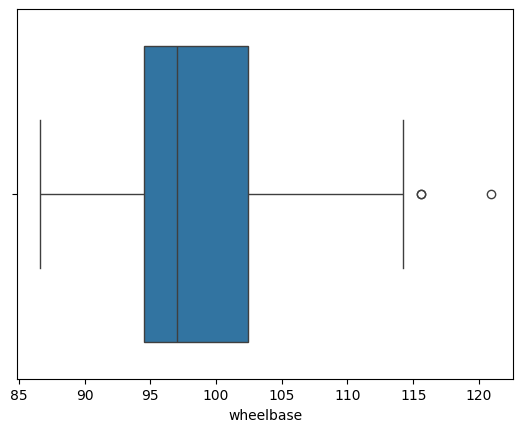

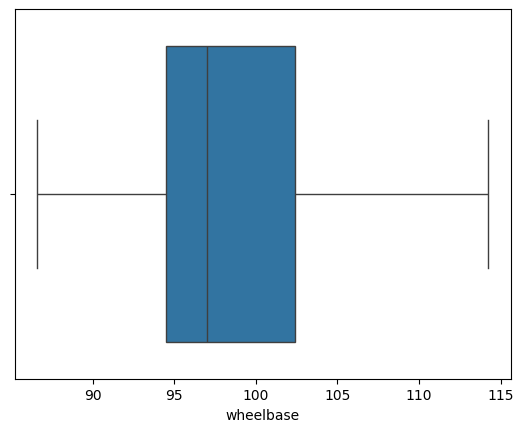

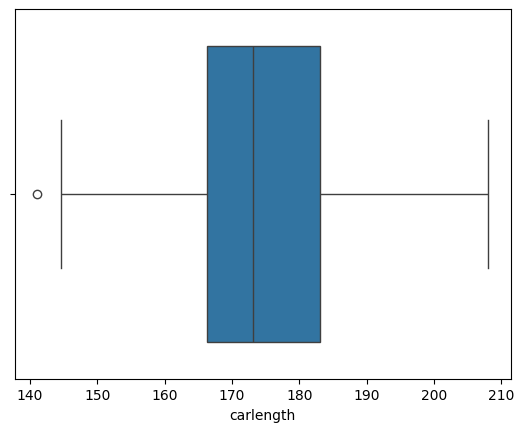

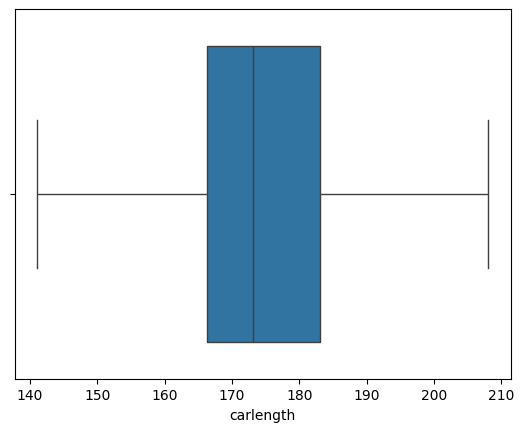

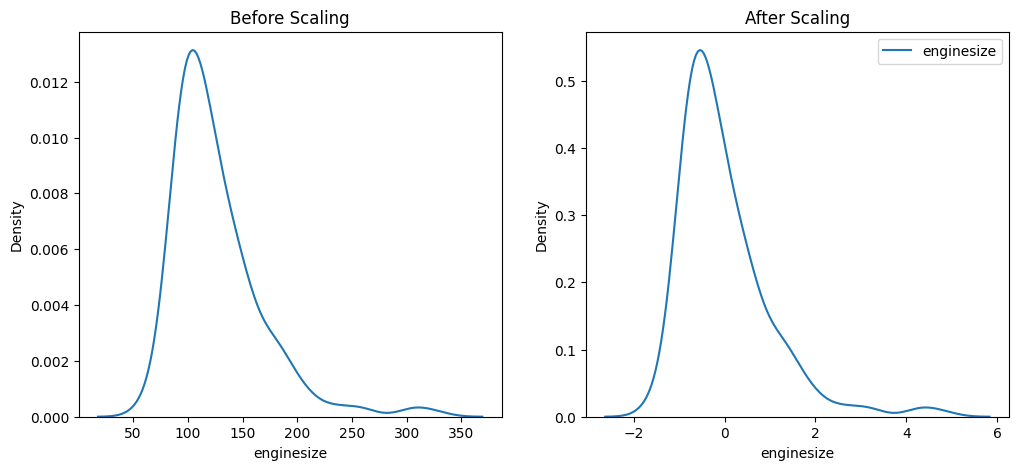

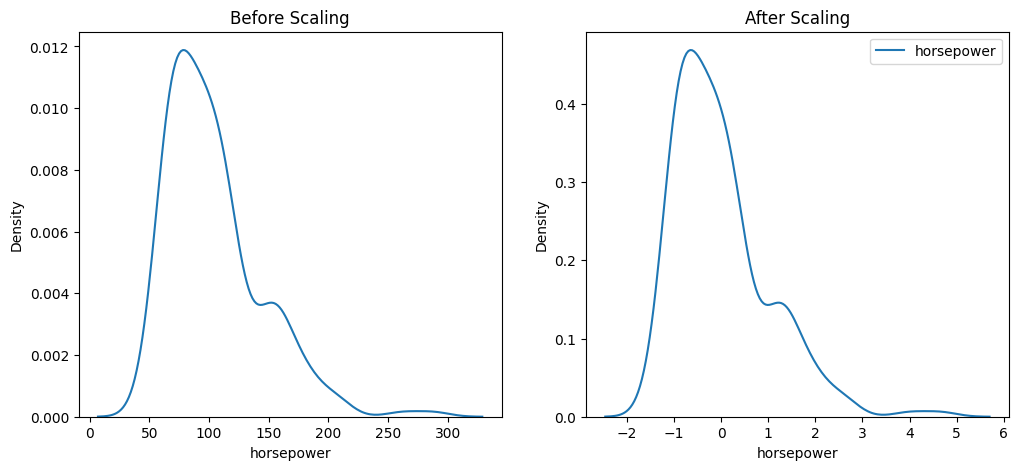

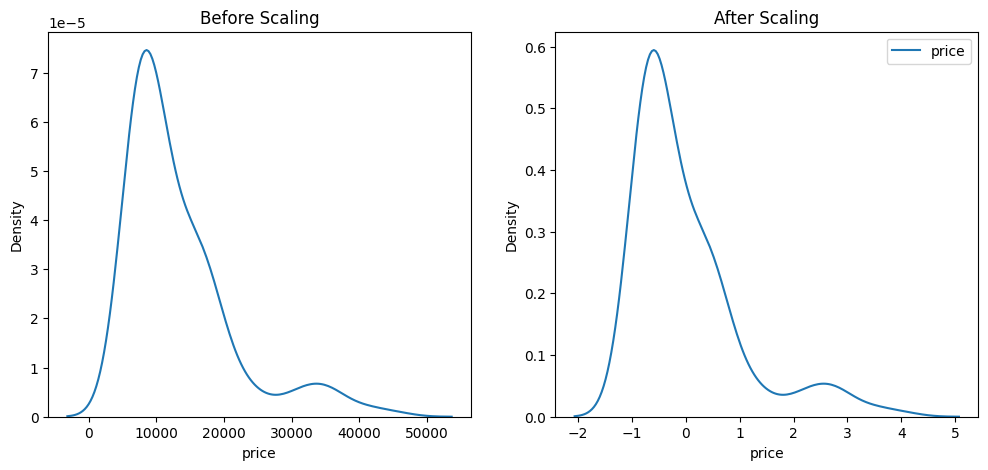

                    car_ID  symboling   CarName  fueltype  aspiration  \
car_ID            1.000000  -0.151621  0.967077 -0.125568    0.067729   
symboling        -0.151621   1.000000 -0.107095  0.194311   -0.059866   
CarName           0.967077  -0.107095  1.000000 -0.069435    0.019914   
fueltype         -0.125568   0.194311 -0.069435  1.000000   -0.401397   
aspiration        0.067729  -0.059866  0.019914 -0.401397    1.000000   
doornumber       -0.190352   0.664073 -0.171745  0.191491   -0.031792   
carbody           0.098303  -0.596135  0.099691 -0.147853    0.063028   
drivewheel        0.051406  -0.041671 -0.016129 -0.132257    0.066465   
enginelocation    0.051483   0.212471  0.055968  0.040070   -0.057191   
wheelbase         0.136702  -0.537515  0.025977 -0.314415    0.264436   
carlength         0.170636  -0.357612  0.053016 -0.212679    0.234539   
carwidth          0.052387  -0.232919 -0.075349 -0.233880    0.300567   
carheight         0.255960  -0.541038  0.201900 -0.

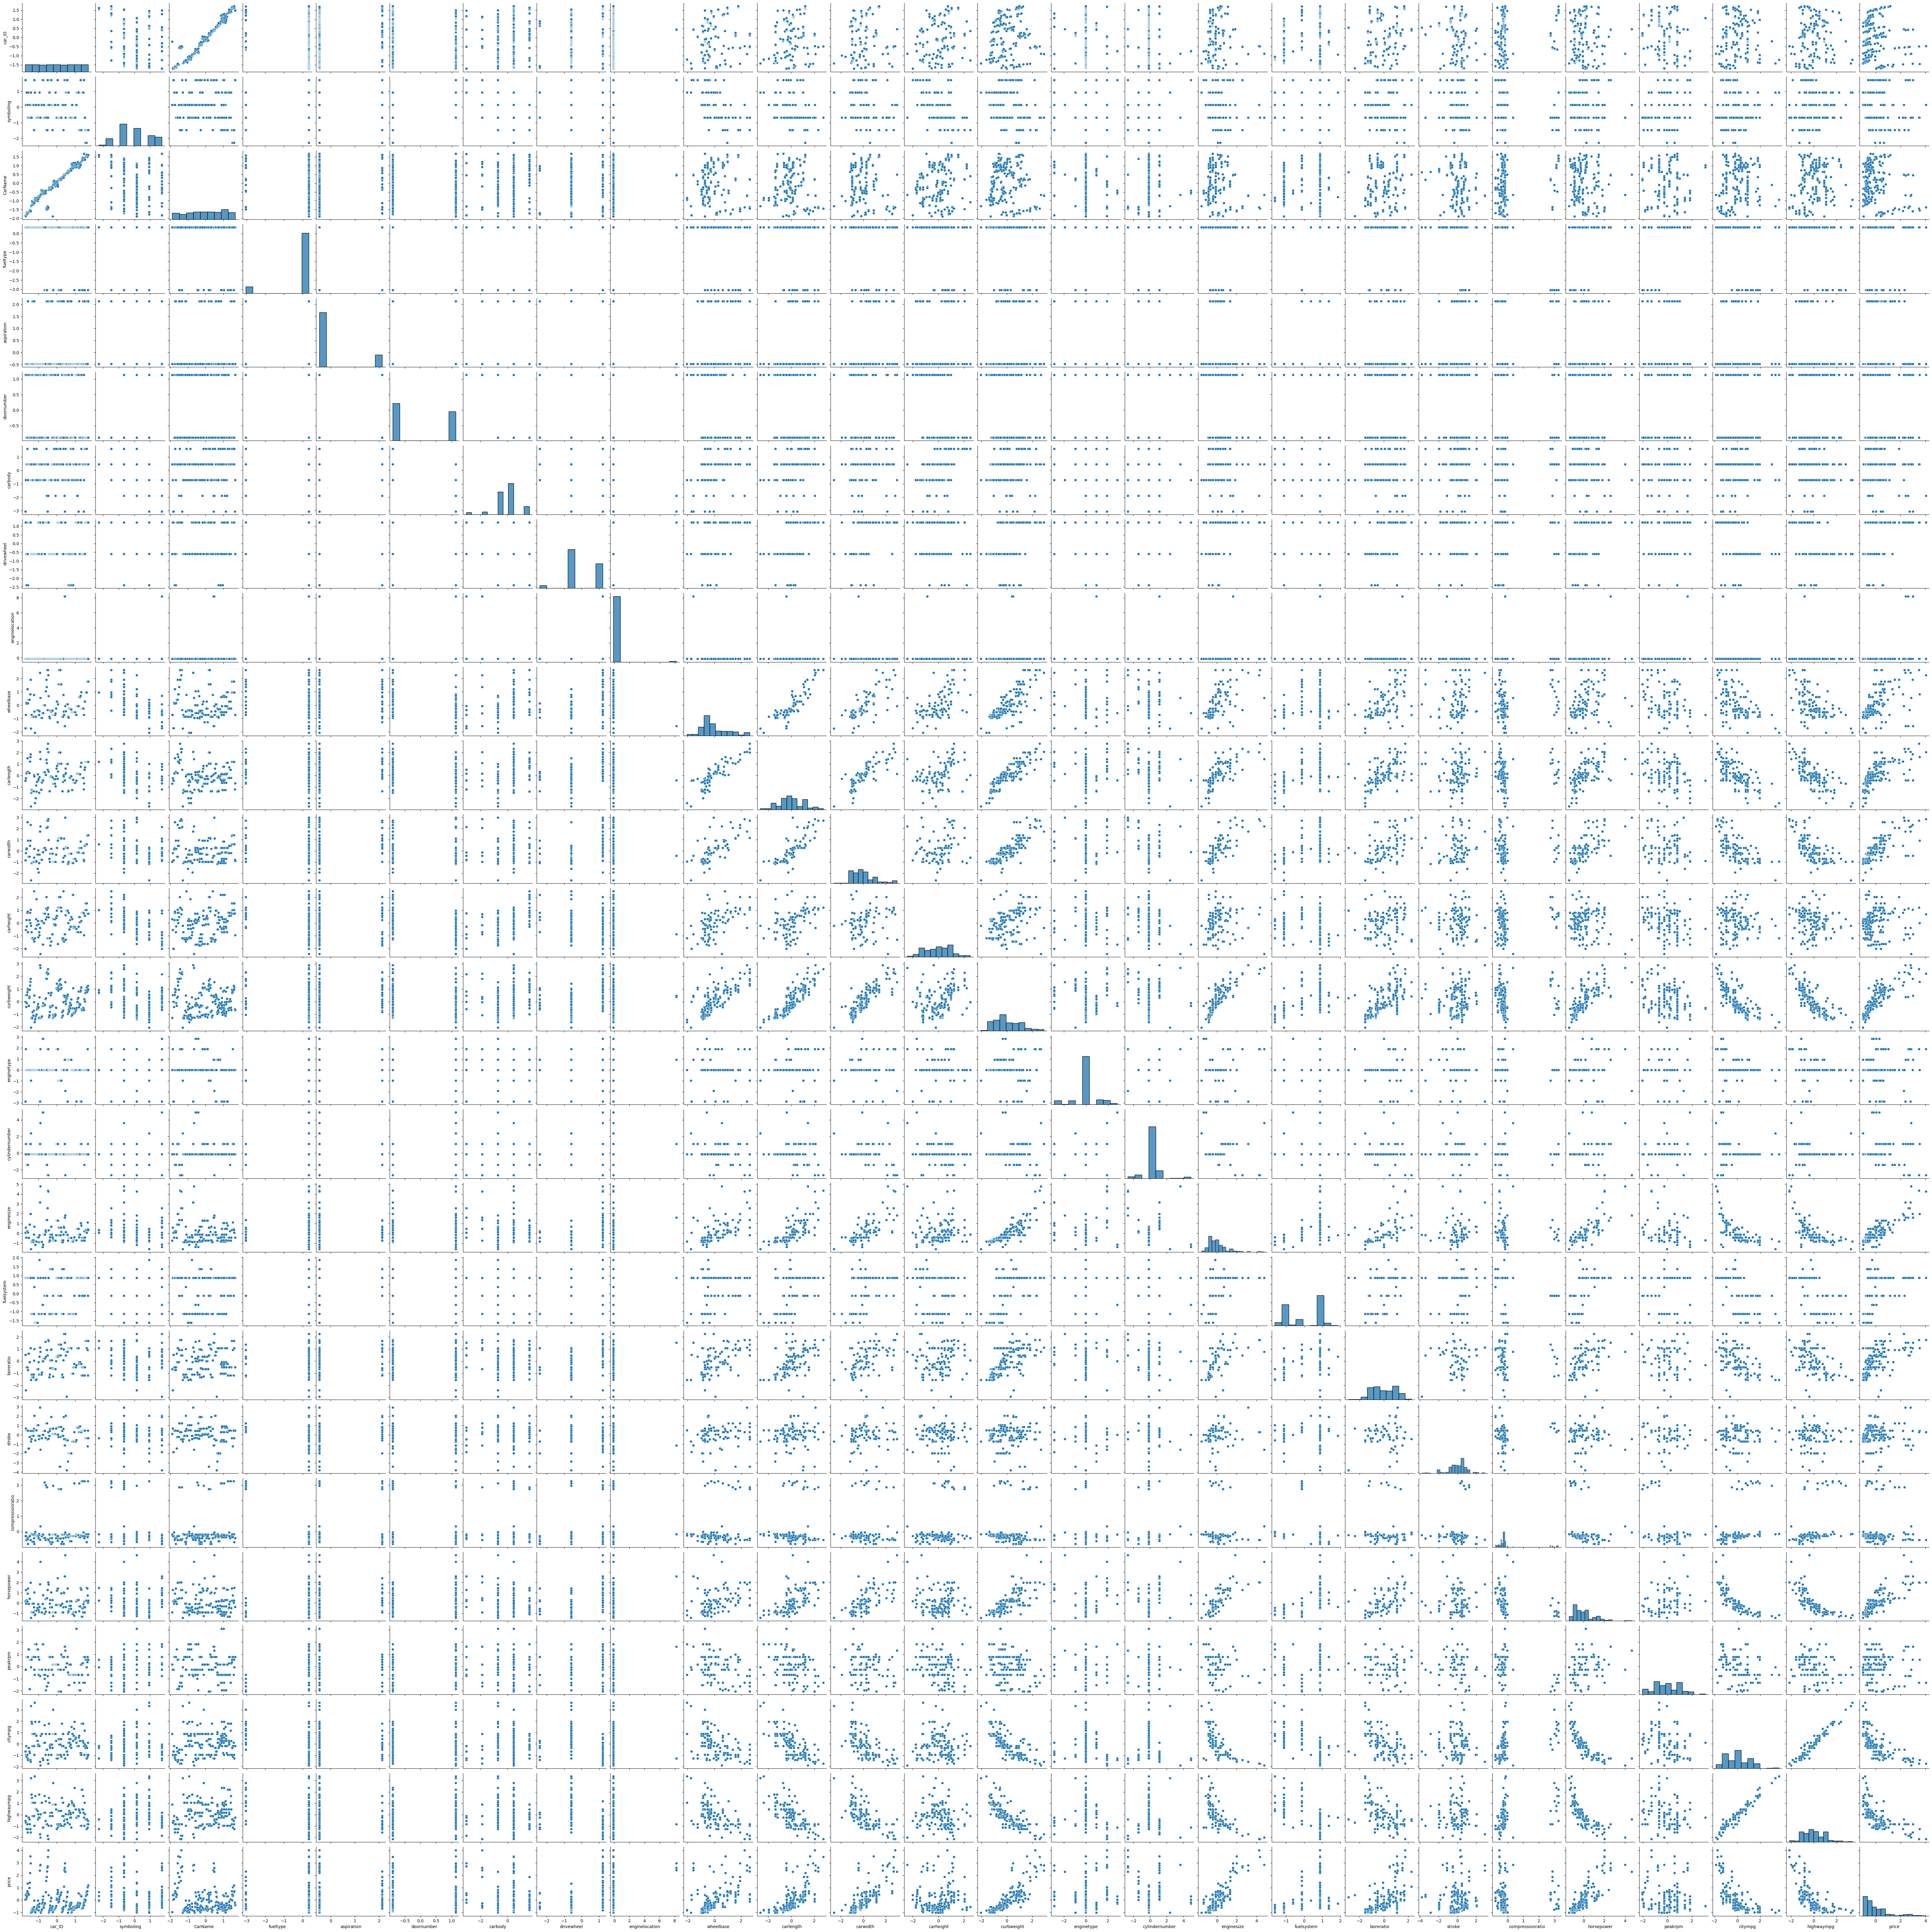

(153, 21) (52, 21) (153,) (52,)
Predicted: (52,)
Actual: (52,)
R2 Score (Actual Data): 0.8473428907099148
(153, 21) (52, 21) (153,) (52,)
Predicted (Scaled Data): (52,)
Actual (Scaled Data): (52,)
R2 Score (Scaled Data): 0.8473428907099054


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
car_data = pd.read_csv("/content/CarPrice_Assignment.csv")
print(car_data.head(5))

pd.set_option('display.max_columns', 26)
print(car_data.info())

# Check for duplicated rows
print(car_data[car_data.duplicated()])

# Check for missing values
print(car_data.isnull().sum())

# Data visualization
sns.barplot(x=car_data.fueltype, y=car_data.price)
plt.show()

sns.scatterplot(x=car_data.enginesize, y=car_data.price, hue=car_data.carbody)
plt.show()

print(car_data.CarName.value_counts())

plt.figure(figsize=(12, 5))
sns.barplot(x=car_data.CarName.value_counts().head(8).index, y=car_data.CarName.value_counts().head(8))
plt.show()

sns.scatterplot(x=car_data.wheelbase, y=car_data.price)
plt.show()

plt.barh(car_data.cylindernumber.value_counts().index, car_data.cylindernumber.value_counts(), color='cyan')
plt.xlabel("Number of Cylinders")
plt.ylabel("Count")
plt.show()

sns.barplot(x=car_data.carbody, y=car_data.price, hue=car_data.aspiration)
plt.show()

sns.barplot(x=car_data.carbody, y=car_data.horsepower, hue=car_data.enginetype)
plt.show()

# Encoding categorical variables
encoder = OrdinalEncoder()
car_data[['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
          'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']] = encoder.fit_transform(
    car_data[['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
              'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']])
print(car_data.head())

# Handling outliers
sns.boxplot(car_data.wheelbase, orient="h")
plt.show()

Q1, Q3 = car_data.wheelbase.quantile([0.25, 0.75])
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
car_data.wheelbase = np.where(car_data.wheelbase > upper_limit, upper_limit, car_data.wheelbase)
car_data.wheelbase = np.where(car_data.wheelbase < lower_limit, lower_limit, car_data.wheelbase)
sns.boxplot(car_data.wheelbase, orient="h")
plt.show()

sns.boxplot(car_data.carlength, orient="h")
plt.show()

Q1, Q3 = car_data.carlength.quantile([0.25, 0.75])
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
car_data.carlength = np.where(car_data.carlength > upper_limit, upper_limit, car_data.carlength)
car_data.carlength = np.where(car_data.carlength < lower_limit, lower_limit, car_data.carlength)
sns.boxplot(car_data.carlength, orient="h")
plt.show()

#  scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(car_data)
scaled_df = pd.DataFrame(scaled_data, columns=car_data.columns)

# Visualization
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("Before Scaling")
sns.kdeplot(car_data['enginesize'], ax=ax1)
ax2.set_title("After Scaling")
sns.kdeplot(scaled_df['enginesize'], ax=ax2)
plt.legend(['enginesize'])
plt.show()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("Before Scaling")
sns.kdeplot(car_data['horsepower'], ax=ax1)
ax2.set_title("After Scaling")
sns.kdeplot(scaled_df['horsepower'], ax=ax2)
plt.legend(['horsepower'])
plt.show()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("Before Scaling")
sns.kdeplot(car_data['price'], ax=ax1)
ax2.set_title("After Scaling")
sns.kdeplot(scaled_df['price'], ax=ax2)
plt.legend(['price'])
plt.show()

print(scaled_df.corr())

sns.pairplot(scaled_df)
plt.show()

X = car_data[['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'carheight',
              'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
              'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
y = car_data.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Predicted:", y_pred.shape)
print("Actual:", y_test.shape)
print("R2 Score (Actual Data):", r2_score(y_test, y_pred))

# Linear regression on scaled data
scaled_X = scaled_df[['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'carheight',
                      'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
                      'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
scaled_y = scaled_df.price

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_X, scaled_y, test_size=0.25, random_state=42)
print(X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape)

regressor_scaled = LinearRegression()
regressor_scaled.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = regressor_scaled.predict(X_test_scaled)
print("Predicted (Scaled Data):", y_pred_scaled.shape)
print("Actual (Scaled Data):", y_test_scaled.shape)
print("R2 Score (Scaled Data):", r2_score(y_test_scaled, y_pred_scaled))